In [5]:
!pip install matplotlib
import matplotlib.pyplot as plt

  Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.4 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (313 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.6 MB/s eta 0:00:0000:0100:01
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.3 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)


In [1]:
import pandas as pd

data = {
    'step': [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400],
    'training_loss': [0.422800, 0.192400, 0.163200, 0.151700, 0.147200, 0.144400, 0.143500, 0.142200, 0.136000, 0.133900, 0.134500, 0.130500, 0.129300, 0.134100, 0.131600, 0.130600],
    'validation_loss': [0.221644, 0.174804, 0.161552, 0.153756, 0.148764, 0.144602, 0.142639, 0.140508, 0.138366, 0.137547, 0.135980, 0.135701, 0.134428, 0.133708, 0.132987, 0.132426]
}

df = pd.DataFrame(data)
print(df)


    step  training_loss  validation_loss
0     25         0.4228         0.221644
1     50         0.1924         0.174804
2     75         0.1632         0.161552
3    100         0.1517         0.153756
4    125         0.1472         0.148764
5    150         0.1444         0.144602
6    175         0.1435         0.142639
7    200         0.1422         0.140508
8    225         0.1360         0.138366
9    250         0.1339         0.137547
10   275         0.1345         0.135980
11   300         0.1305         0.135701
12   325         0.1293         0.134428
13   350         0.1341         0.133708
14   375         0.1316         0.132987
15   400         0.1306         0.132426


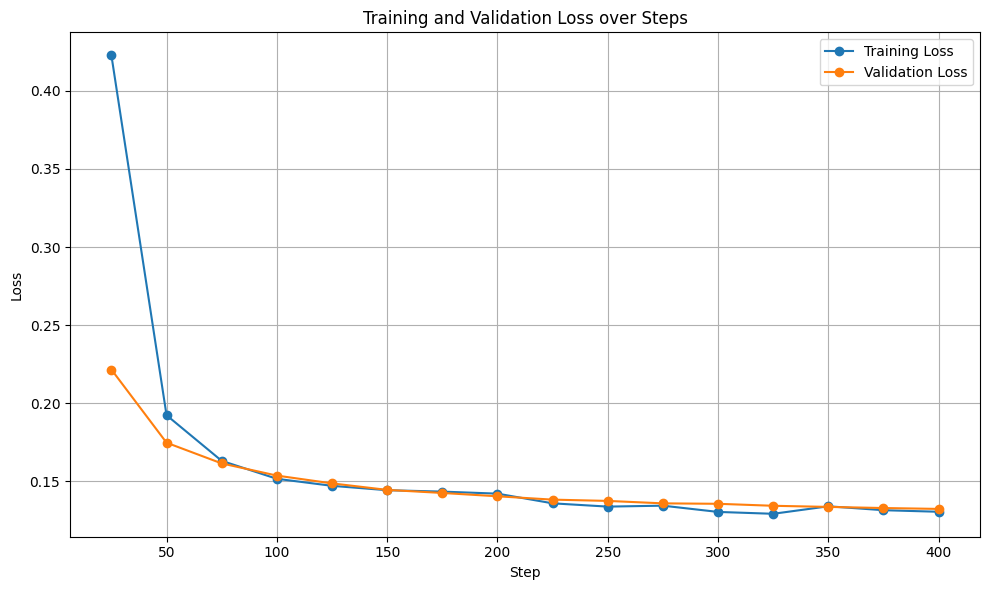

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['training_loss'], label='Training Loss', marker='o')
plt.plot(df['step'], df['validation_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss over Steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save or show the plot
#plt.savefig('training_validation_loss_plot.png', dpi=300)
plt.show()

## Qualitative Analysis

In [89]:
from pathlib import Path
import pickle
from swarm_descriptions.mission_elements.arena import CircularArena, RectangularArena
import numpy as np

In [13]:
datasets = []
dataset_path = Path("../ressources/data/eval_checkpoints/")
individual_datasets = list(dataset_path.iterdir())
for dataset in individual_datasets:
    datasets.append(pd.read_pickle(dataset))
    
datasets[0].columns

Index(['description', 'configuration', 'parameters', 'response',
       'argos_config', 'argos_success'],
      dtype='object')

In [21]:
metrics = pd.read_csv("../ressources/eval_result.csv")
metrics["step"] = metrics.dataset.map(lambda x: int(x.split("-")[1]))
metrics.head()

,bleu_score_mean,bleu_score_var,invalid_config_params,invalid_argos_configs,dataset,step
0,0.863942,0.014835,0.500000,0.142857,checkpoint-25,25
1,0.836989,0.053177,0.142857,0.571429,checkpoint-50,50
2,0.914831,0.022470,0.142857,0.285714,checkpoint-75,75
3,0.904558,0.032057,0.285714,0.642857,checkpoint-100,100
4,0.831330,0.034590,0.428571,0.500000,checkpoint-125,125


### Conversion Results

In [42]:
share_circles = [ds.parameters.map(lambda x: isinstance(x.arena_params, CircularArena)).mean()  for ds in datasets]
share_circles

[0.5714285714285714,
 0.21428571428571427,
 0.35714285714285715,
 0.35714285714285715,
 0.5,
 0.5714285714285714,
 0.42857142857142855,
 0.35714285714285715,
 0.35714285714285715,
 0.5714285714285714,
 0.6428571428571429,
 0.42857142857142855,
 0.7857142857142857,
 0.7142857142857143,
 0.35714285714285715,
 0.42857142857142855]

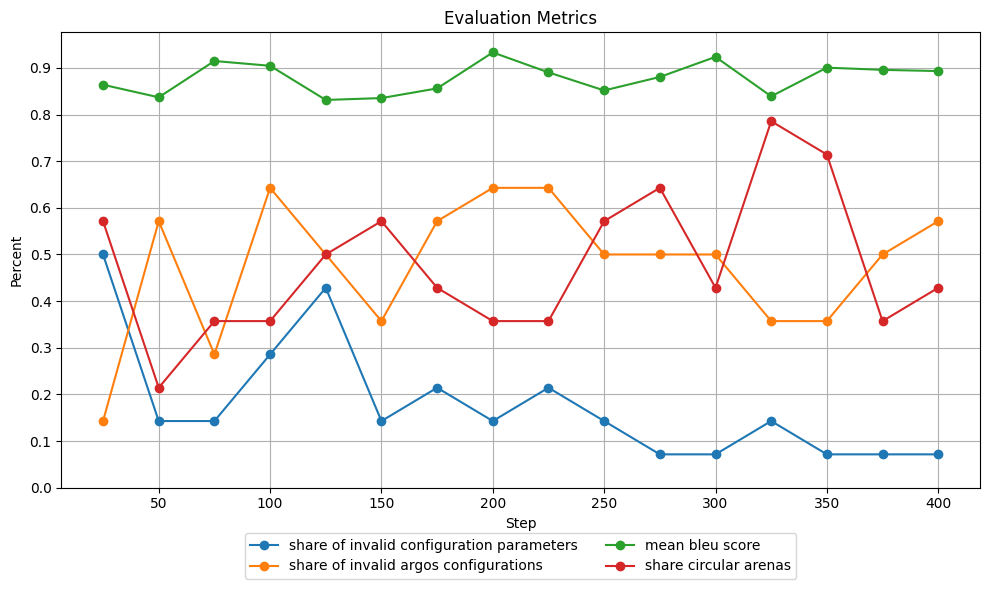

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(metrics['step'], metrics['invalid_config_params'], label='share of invalid configuration parameters', marker='o')
plt.plot(metrics['step'], metrics['invalid_argos_configs'], label='share of invalid argos configurations', marker='o')
plt.plot(metrics['step'], metrics['bleu_score_mean'], label='mean bleu score', marker='o')
plt.plot(metrics['step'], share_circles, label='share circular arenas', marker='o')
plt.title('Evaluation Metrics')
plt.xlabel('Step')
plt.ylabel('Percent')
plt.yticks(np.arange(0, 1, step=0.1))
plt.legend(bbox_to_anchor=[0.5, -0.15], 
           loc='center', ncol=2)
plt.grid(True)
plt.tight_layout()

# Save or show the plot
#plt.savefig('training_validation_loss_plot.png', dpi=300)
plt.show()

In [112]:
invalid_circles = [[row if isinstance(row.parameters.arena_params, CircularArena) and row.argos_success == False and row.argos_config is not None else None for index, row in ds.iterrows()] for ds in datasets]
invalid_circles = [row for l in invalid_circles for row in l if row is not None]
len(invalid_circles)

60

In [88]:
valid_circles = [[row if isinstance(row.parameters.arena_params, CircularArena) and row.argos_success == True else None for index, row in ds.iterrows()] for ds in datasets]
valid_circles = [row for l in valid_circles for row in l if row is not None]
len(valid_circles)

8

In [94]:
invalid_rects = [row for ds in datasets for index, row in ds.iterrows() if isinstance(row.parameters.arena_params, RectangularArena) and row.argos_success == False and row.argos_config is not None]
len(invalid_rects)

17

In [105]:
invalid_config_params = [row for ds in datasets for index, row in ds.iterrows() if row.argos_config is None]
len(invalid_config_params)

40

In [127]:
row = invalid_circles[25]
print(row.description)
with open('/tmp/config_params', 'w') as file:
    file.write(row.response)

With a radius of 1.94 meters, the circular arena is made up of 17 walls. The arena is illuminated by 2 lights evenly distributed across the space. Placed within a 0.95-meter radius around the center are 18 robots. In the floor space, you'll discover two distinct areas: a circle at [0.86, -1.13] in white, and another circle at [0.93, 1.11] in black. The primary objective for the robots is to aggregate at the white circle. 
